### Assignment 1
#### Meenu Ravi
#### April 7 2021


#### Stationarity

#### A) 10 pts Task: Perform EDA on the dataset. Include both quantitative and qualitative descriptions. Check for missing data and correlations.

In [1]:
# Import statements
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data= pd.read_csv("hw1_data.csv")
data.head(20)

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491
5,2000-06-05,38.820915,81.691734,99.537231
6,2000-06-06,39.201530,79.420624,99.093246
7,2000-06-07,39.249096,81.542145,99.780373
8,2000-06-08,39.153946,81.161362,99.389206
9,2000-06-09,39.843784,81.596519,99.177795


In [3]:
# Looking at the dimension
data.shape

(4972, 4)

In [4]:
# checking how many null values are in each column
data['Date'].isnull().sum()

0

In [5]:
data['IWM'].isnull().sum()

0

In [6]:
data['QQQ'].isnull().sum()

0

In [7]:
data['SPY'].isnull().sum()

0

In [8]:
# Looking at the data types
data.dtypes

Date     object
IWM     float64
QQQ     float64
SPY     float64
dtype: object

In [9]:
#Looking at the number of duplicate rows
duplicateRows = data[data.duplicated()]
print("# Duplicate Rows:", duplicateRows.shape)

# Duplicate Rows: (0, 4)


(4972, 4)

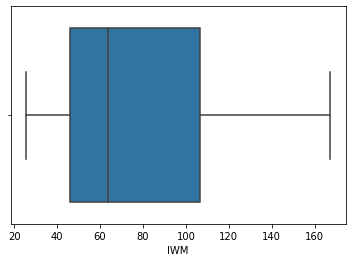

In [10]:
#Looking at outliers
sns.boxplot(x=data['IWM'])
Q1 = data['IWM'].quantile(0.25)
Q3 = data['IWM'].quantile(0.75)
IQR = Q3 - Q1   

filter = (data['IWM'] >= Q1 - 1.5 * IQR) & (data['IWM'] <= Q3 + 1.5 *IQR)
newdata=data.loc[filter] 
newdata.shape

(4889, 4)

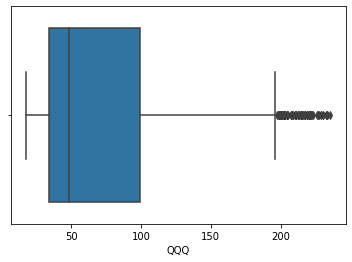

In [11]:
sns.boxplot(x=data['QQQ'])
Q1 = data['QQQ'].quantile(0.25)
Q3 = data['QQQ'].quantile(0.75)
IQR = Q3 - Q1   

filter = (data['QQQ'] >= Q1 - 1.5 * IQR) & (data['QQQ'] <= Q3 + 1.5 *IQR)
newdata=data.loc[filter] 
newdata.shape

(4953, 4)

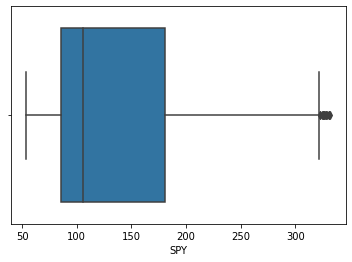

In [12]:
sns.boxplot(x=data['SPY'])
Q1 = data['SPY'].quantile(0.25)
Q3 = data['SPY'].quantile(0.75)
IQR = Q3 - Q1   

filter = (data['SPY'] >= Q1 - 1.5 * IQR) & (data['SPY'] <= Q3 + 1.5 *IQR)
newdata=data.loc[filter] 
newdata.shape

,IWM,QQQ,SPY
IWM,1.000000,0.950877,0.982987
QQQ,0.950877,1.000000,0.986423
SPY,0.982987,0.986423,1.000000


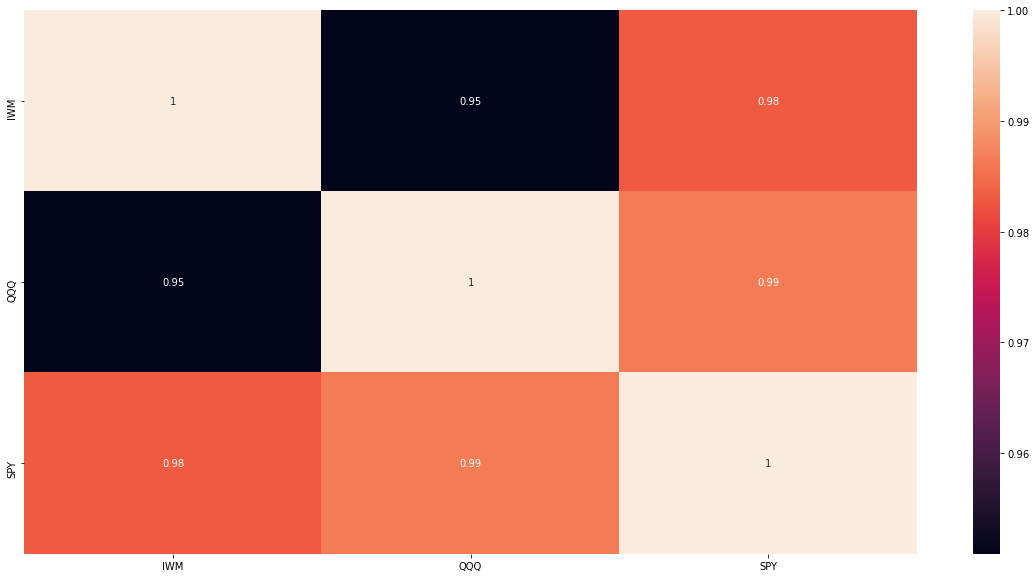

In [13]:
#looking at correlation
plt.figure(figsize=(20,10))
correlation= data.corr()
sns.heatmap(correlation,annot=True)
correlation

<AxesSubplot:>

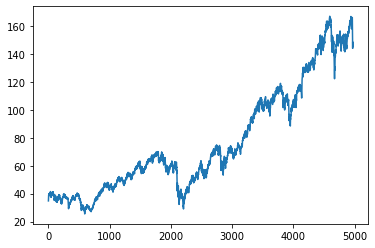

In [14]:
#Looking at plots
data['IWM'].plot()

<AxesSubplot:>

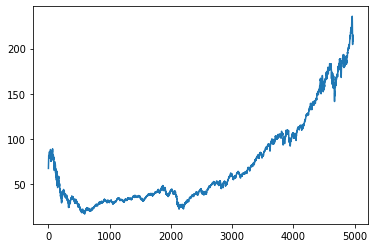

In [15]:
data['QQQ'].plot()

<AxesSubplot:>

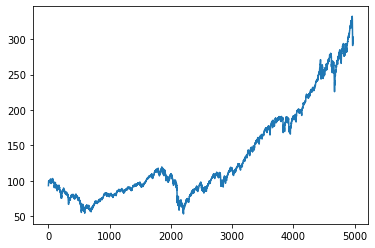

In [16]:
data['SPY'].plot()

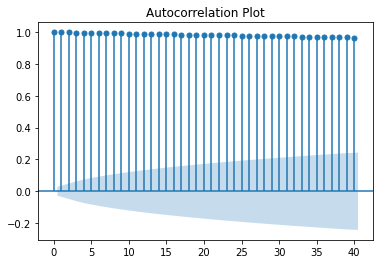

In [17]:
#looking at ACF
p=plot_acf(data['IWM'], lags=40,title='Autocorrelation Plot')

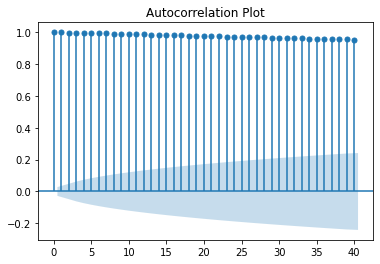

In [18]:
p=plot_acf(data['QQQ'], lags=40,title='Autocorrelation Plot')

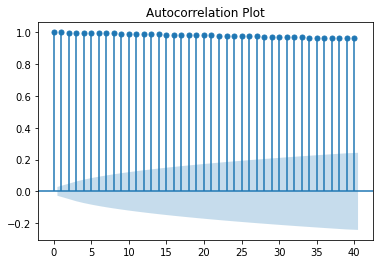

In [19]:
p=plot_acf(data['SPY'], lags=40,title='Autocorrelation Plot')

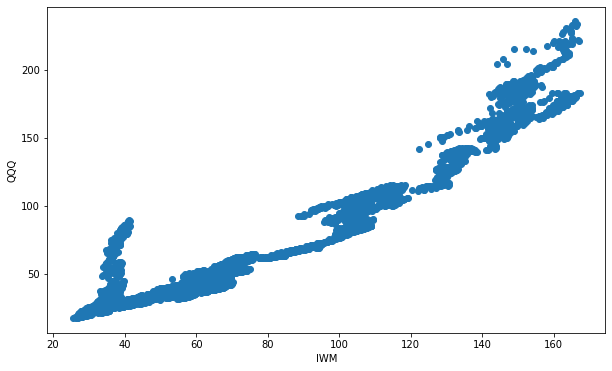

In [20]:
#Plotting each pair of variables
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['IWM'], data['QQQ'])
ax.set_xlabel('IWM')
ax.set_ylabel('QQQ')
plt.show()

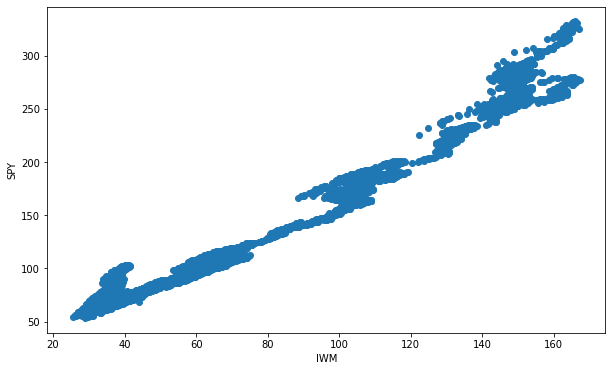

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['IWM'], data['SPY'])
ax.set_xlabel('IWM')
ax.set_ylabel('SPY')
plt.show()

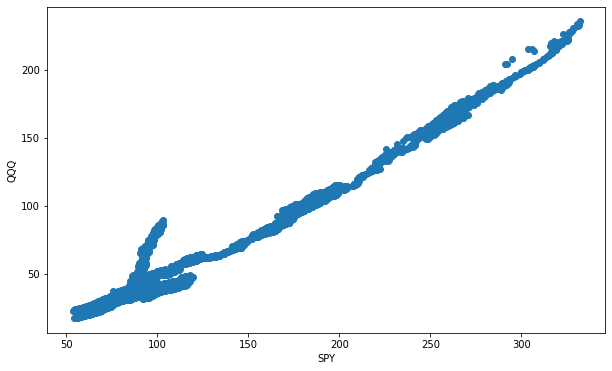

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['SPY'], data['QQQ'])
ax.set_xlabel('SPY')
ax.set_ylabel('QQQ')
plt.show()

This dataset has 4972 rows and 4 columns. There are no missing or null values in any of the 4 columns. Also, there are no duplicate rows. IWM has no outliers. QQQ has 83 outliers and SPY has 19 outliers. All the three variable positively correlate with each other well.

#### B) 5 pts Concept: Describe the data. Do you expect this data to be stationary? Do you expect this data to be a random walk?

This dataset has 4972 rows and 4 columns. There are no missing or null values in any of the 4 columns. Also, there are no duplicate rows. IWM has no outliers. QQQ has 83 outliers and SPY has 19 outliers. All the three variable positively correlate with each other well. So, as one variable increase, as does the other.
I do not expect this data to be not stationary. From the plots above, I see for the variables, the plot increases over time. There isn't some sort of seasonality. 

#### C) 10 pts Task: Create a function that returns the stationarity test results from both ADF and KPSS tests

In [23]:
def adf_kpss_test(timeseries,trend='c'):
    #Perform Dickey-Fuller test:
    df_results=[]
    kpss_results=[]
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("---------------")
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    for i in dfoutput:
        i=round(i,6)
        df_results.append(i)
    for i in kpss_output:
        i=round(i,6)
        kpss_results.append(i)
    return (df_results,kpss_results)


#### D) 5 pts Task: Use the function to test if each series is stationary. Return results from both ADF and KPSS tests for all three time series

In [24]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['IWM'], trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                   -0.148096
p-value                           0.944432
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            2.610149
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [25]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['QQQ'], trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                    2.525983
p-value                           0.999058
#Lags Used                       31.000000
Number of Observations Used    4940.000000
Critical Value (1%)              -3.431674
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567082
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            3.103066
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [26]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['SPY'], trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                    1.575206
p-value                           0.997781
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            3.121065
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### E) 5 pts Task: Difference the three time series and return stationarity results from both ADF and KPSS tests

In [42]:
difference_IWM=(data['IWM']-data['IWM'].shift()).iloc[1:]
difference_QQQ=(data['QQQ']-data['QQQ'].shift()).iloc[1:]
difference_SPY=(data['SPY']-data['SPY'].shift()).iloc[1:]


1        3.044495
2        0.211418
3        1.691376
4        1.712524
5       -0.486259
          ...    
4967    -1.128876
4968   -13.733521
4969    -1.227112
4970    12.594757
4971    -8.687714
Name: SPY, Length: 4971, dtype: float64

In [28]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(difference_IWM, trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -1.691899e+01
p-value                        9.973516e-30
#Lags Used                     1.600000e+01
Number of Observations Used    4.954000e+03
Critical Value (1%)           -3.431671e+00
Critical Value (5%)           -2.862124e+00
Critical Value (10%)          -2.567081e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.033087
p-value                   0.100000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: True


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [29]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(difference_QQQ, trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -1.263776e+01
p-value                        1.457323e-23
#Lags Used                     3.000000e+01
Number of Observations Used    4.940000e+03
Critical Value (1%)           -3.431674e+00
Critical Value (5%)           -2.862125e+00
Critical Value (10%)          -2.567082e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.025442
p-value                   0.100000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: True


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [30]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(difference_SPY, trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -1.683886e+01
p-value                        1.142343e-29
#Lags Used                     1.600000e+01
Number of Observations Used    4.954000e+03
Critical Value (1%)           -3.431671e+00
Critical Value (5%)           -2.862124e+00
Critical Value (10%)          -2.567081e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.027663
p-value                   0.100000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: True


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### F) 10 pts Concept: Explain how you can get different stationarity results from the two tests.

In the KPSS test, if p-value is < alpha value (for example 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary. So if the p value is 0.03 for both tests, KPSS would say non stationary and the ADF test would say stationary. This is one way you could get different stationarity results from the two tests.
If the KPSS test indicates stationarity and the ADF indicated non-stationarity, the series is trend stationary. The trend needs to be removed to make the series stationary. The detrended series is checked for stationarity. If the KPSS indicates non stationarity and the ADF indicates stationarity, the series is difference stationary. Differencing is used to make the series stationary. The differenced series is checked for stationarity

#### G) 5 pts Concept: What does trend stationary mean?

A stationary time series is one that has statistical properties such as mean, variance, and autocorrelation that are all constant over time. A lot of time series are far from stationary when the data is extracted using the original time measurement. Even after seasonal adjustment, they will typically still exhibit trendsor cycles. If the series has a stable long-run trend and tends to revert to the trend line following a shock or disturbance, then the series will converge again towards the trend, and also, the series can be de trended by removing the underlying trend and leaves a stationary trend, this series is said to be trend stationary.

#### Random Walk

#### A) 5 pts Task: Using random.sample create a sample with length 1000 of 1 if >=0.5 and -1 if less than 0.5

In [31]:
randomSample=np.random.random_sample((1000,))
adjustedSample=[]
for i in randomSample:
    if i>=0.5:
        adjustedSample.append(1)
    else:
        adjustedSample.append(-1)
print(randomSample[:10])
print(adjustedSample[:10])
print(len(adjustedSample))
adjustedSample= np.array(adjustedSample)

[0.73025383 0.13032356 0.01402309 0.96153141 0.63421938 0.0042383
 0.08749444 0.94319919 0.86580702 0.94670566]
[1, -1, -1, 1, 1, -1, -1, 1, 1, 1]
1000


#### B) 5 pts Task: Use cumulative sum to create movement

In [32]:
cumSum=np.cumsum(adjustedSample)
cumSum[:10]

array([ 1,  0, -1,  0,  1,  0, -1,  0,  1,  2], dtype=int32)

#### C) 5 pts Concept: Describe which of the two series created in 2a and 2b is a random walk, why? What is the other series?

In [33]:
sampleSeries = pd.Series(adjustedSample) 
cumSumSeries=pd.Series(cumSum) 

<AxesSubplot:>

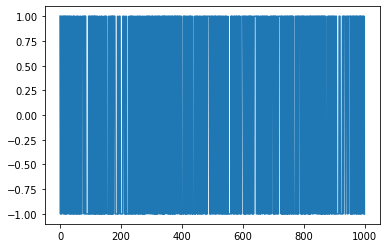

In [34]:
sampleSeries.plot()

<AxesSubplot:>

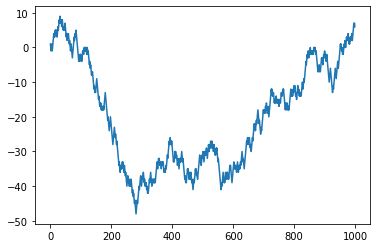

In [35]:
cumSumSeries.plot()

2b is a random walk because in each time period, going from left to right, the value of the variable takes an independent random step up or down. An up or down movements is equally likely at each step and has that zig zag shape. Also, you can see a somewhat shape to the plot. 2b indicates a random walk because the succeeding values in the sequence is from a modification of the preceeding value in the sequence. I have shown the plots above. 2a is not random walk because it is just a sequence of random values.

#### D) 5 pts Task: Create two plots of the random walk time series, use .plot() and use autocorrelation_plot()

<AxesSubplot:>

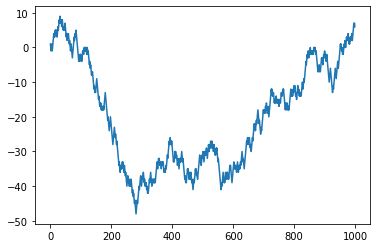

In [36]:
cumSumSeries.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

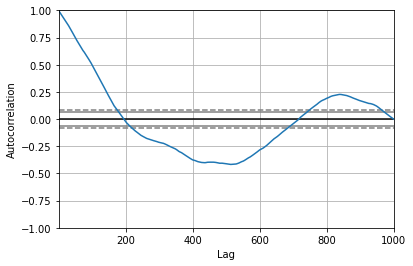

In [37]:
 autocorrelation_plot(cumSumSeries)

#### E) 10 pts Concept: Is the random walk stationary? Defend using quantitative tests.

This random walk is not stationary. This is because the current observation is a random step from the previous observation.  Below, I use the quantitative test ADF and KPSS to validate.

In [38]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(cumSumSeries, trend='ct')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                  -0.798537
p-value                          0.819551
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.954534
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


c:\users\meenu\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### F) 5 pts Task: Difference the data and show the autocorrelation plot

In [39]:
difference_data=(cumSumSeries-cumSumSeries.shift()).iloc[1:]
difference_data.head(10)

1    -1.0
2    -1.0
3     1.0
4     1.0
5    -1.0
6    -1.0
7     1.0
8     1.0
9     1.0
10    1.0
dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

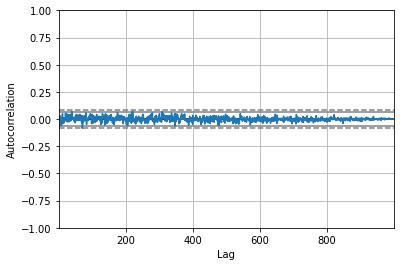

In [40]:
 autocorrelation_plot(difference_data)

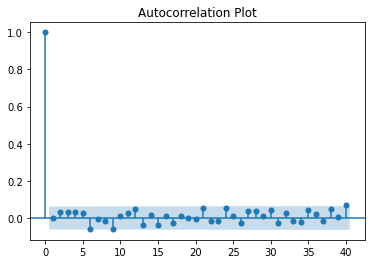

In [41]:
p =plot_acf(difference_data, lags=40,title='Autocorrelation Plot')

#### G) 10 pts Concept: What is the significance of this correlation plot?

The autocorrelation plot for this random sample shows that most of the spikes are not statistically significant. The mean is somewhat constant over time. All the correlation are very small. There is no significant relationship between the lagged observations,

#### H) 5 pts Concept: Can a random walk be predicted? Why or why not?

Although a random walk can be forecasted naively, a random walk cannot be sufficiently predicted. A random walk is formed by using the previous observation at the previous time step and say what with happen the next day. Sp, to say what will happen tomrrow, you are using today's observation, yesterday's oberservatio, and the previous day's observation etc. along with a randomness. We can do this because we know that the next time day will be a function of the prior day. Because you are taking into account this randomness, you cannot reasonably predict but you can form a naive prediction.
